In [1]:
from typing import Set
from dataclasses import asdict
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from dateutil.parser import isoparse
from label import Label
from ast import literal_eval

In [2]:
df_issues = pd.read_csv("issues.csv")

In [3]:
df_issues.shape

(8673, 30)

In [4]:
df_issues.columns

Index(['Unnamed: 0', 'url', 'repository_url', 'labels_url', 'comments_url',
       'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user',
       'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone',
       'comments', 'created_at', 'updated_at', 'closed_at',
       'author_association', 'active_lock_reason', 'body', 'reactions',
       'timeline_url', 'performed_via_github_app', 'state_reason', 'score'],
      dtype='object')

In [5]:
df_issues = df_issues.drop_duplicates("id")

In [6]:
df_issues["closed_at"] = df_issues["closed_at"].apply(isoparse)
df_issues["created_at"] = df_issues["created_at"].apply(isoparse)

In [7]:
df_issues["time_to_complete"] = (df_issues["closed_at"] - df_issues["created_at"])
df_issues["time_to_complete"] = df_issues["time_to_complete"].apply(timedelta.total_seconds)

In [8]:
def load_label_str(label_str: str) -> Label:
    eval_result = literal_eval(label_str)
    return Label(**eval_result)

In [9]:
TAGS: Set[Label] = set()
for value in df_issues["labels"].values:
    labels = literal_eval(value)
    for elem in labels:
        TAGS.add(Label(**elem))
df_tags = pd.DataFrame.from_records([asdict(tag) for tag in TAGS])
df_tags

,id,node_id,url,name,color,default,description
0,256180708,MDU6TGFiZWwyNTYxODA3MDg=,https://api.github.com/repos/TeamNewPipe/NewPi...,feature request,84b6eb,False,Issue is related to a feature in the app.
1,1172735856,MDU6TGFiZWwxMTcyNzM1ODU2,https://api.github.com/repos/TeamNewPipe/NewPi...,media.ccc.de,9e9e9e,False,"Service, https://media.ccc.de/"
2,751133634,MDU6TGFiZWw3NTExMzM2MzQ=,https://api.github.com/repos/TeamNewPipe/NewPi...,bounty,006b75,False,Whoever solves this gets a bounty: https://app...
3,4715397137,LA_kwDOAn8tB88AAAABGQ9AEQ,https://api.github.com/repos/TeamNewPipe/NewPi...,playlist,609D48,False,Anything to do with playlists in the app.
4,256180709,MDU6TGFiZWwyNTYxODA3MDk=,https://api.github.com/repos/TeamNewPipe/NewPi...,help wanted,159818,True,Help is wanted in fixing this issue
5,2110094950,MDU6TGFiZWwyMTEwMDk0OTUw,https://api.github.com/repos/TeamNewPipe/NewPi...,bandcamp,18d7f4,False,"Service, https://bandcamp.com/"
6,2503301905,MDU6TGFiZWwyNTAzMzAxOTA1,https://api.github.com/repos/TeamNewPipe/NewPi...,template missing,ef5684,False,The bug/feature template is missing (e.g. the ...
7,1438951503,MDU6TGFiZWwxNDM4OTUxNTAz,https://api.github.com/repos/TeamNewPipe/NewPi...,downloader,57e0a7,False,Issue is related to the downloader.
8,3477028530,LA_kwDOAn8tB87PPz6y,https://api.github.com/repos/TeamNewPipe/NewPi...,queue,bfd4f2,False,Issue is related to queueing
9,1695079919,MDU6TGFiZWwxNjk1MDc5OTE5,https://api.github.com/repos/TeamNewPipe/NewPi...,localisation / translation,144d3f,False,Everything that has to do with translations or...


In [10]:
print([tag.name for tag in TAGS])

['feature request', 'media.ccc.de', 'bounty', 'playlist', 'help wanted', 'bandcamp', 'template missing', 'downloader', 'queue', 'localisation / translation', 'niche', 'duplicate', 'wontfix', 'CI', 'meta', 'discussion', 'requires extractor change', 'codequality', 'Android TV', 'peertube', 'privacy & data protection', 'multiservice', 'accessibility', 'user blocked us', 'channel', 'player notification', 'soundcloud', 'tablet UI', 'youtube', 'feed', 'waiting for author', 'good first issue', 'device/software specific', 'bug', 'GUI', 'template ignored', 'needs triage', 'database', 'player', 'question', 'ASAP']


<AxesSubplot: >

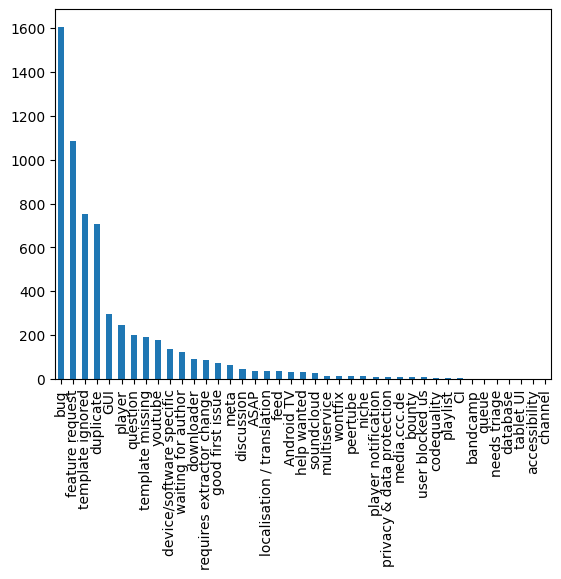

In [11]:
parsed_labels = [literal_eval(label_list) for idx, label_list in df_issues["labels"].items()] #parse labels
flattened_labels = [Label(**item) for item in itertools.chain.from_iterable(parsed_labels)] # flatten and convert to Label
labels_count = pd.Series(item.name for item in flattened_labels).value_counts()
labels_count.plot(kind="bar",)

In [12]:
df_label_means = pd.DataFrame()
for tag in TAGS:
    mean = df_issues.loc[df_issues["labels"].str.contains(tag.node_id)]["time_to_complete"].mean()
    df_label_means = pd.concat([df_label_means, pd.DataFrame.from_records([{"label": tag.name, "time_to_complete_avg": mean}])], ignore_index=True)